In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df= pd.read_csv(city_data_to_load)
ride_df= pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
print(city_df.head())
print(ride_df.head())
city_ride_df = pd.merge(city_df,ride_df,on= "city", how= "outer")

# Display the data table for preview
city_ride_df.head()

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city             date   fare        ride_id
0  Lake Jonathanshire  1/14/2018 10:14  13.83  5739410000000
1  South Michelleport   3/4/2018 18:24  30.24  2343910000000
2  Port Samanthamouth   2/24/2018 4:29  33.44  2005070000000
3          Rodneyfort  2/10/2018 23:22  23.44  5149250000000
4          South Jack    3/6/2018 4:28  34.58  3908450000000


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5628550000000
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,910050000000
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,820639000000
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9554940000000
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,720021000000


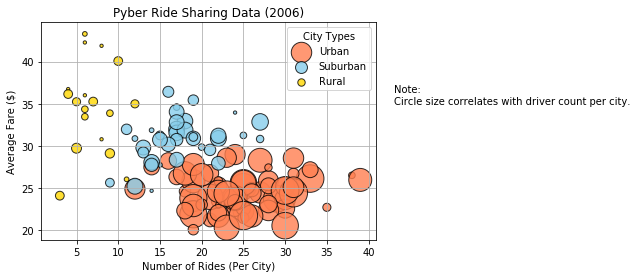

In [58]:
# Obtain the x and y coordinates for each of the three city types
#pull out data needed to find answers and use variables to store.
rides_by_city = city_ride_df.groupby('type')['city'].value_counts()
average_fare = city_ride_df.groupby(['type', 'city'])['fare'].mean()
driver_count = city_df.set_index(['type','city']).loc[:,'driver_count']

#create df to reference answers
plot_df = pd.DataFrame({
    'Number of Rides': rides_by_city,
    'Average Fare': average_fare,
    'Driver Count': driver_count,
})


#plot_df tested df and it appearsw correct, build scatter
# Build the scatter plots for each city types
urban_plot = plt.scatter(
    plot_df.loc['Urban', 'Number of Rides'],
    plot_df.loc['Urban', 'Average Fare'],
    s=11*plot_df.loc['Urban','Driver Count'],
    label='Urban',
    color='coral',
    alpha=0.8,
    edgecolor='black')

suburban_plot = plt.scatter(
    plot_df.loc['Suburban', 'Number of Rides'],
    plot_df.loc['Suburban', 'Average Fare'],
    s=11*plot_df.loc['Suburban','Driver Count'],
    label='Suburban',
    color='SkyBlue',
    alpha=0.8,
    edgecolor='black')

rural_plot = plt.scatter(
    plot_df.loc['Rural', 'Number of Rides'],
    plot_df.loc['Rural','Average Fare'],
    s = 11*plot_df.loc['Rural','Driver Count'],
    label = 'Rural',
    color = 'Gold',
    alpha = 0.8,
    edgecolor = 'black')


# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2006)')
plt.xlabel('Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()
# Create a legend
plt.legend(title = 'City Types')

# Incorporate a text label regarding circle size
plt.text(43,35,'Note:\nCircle size correlates with driver count per city.')


# Save Figure
plt.savefig('Pyber 2016 Ride Sharing Data - Bubble Plot')
plt.show()

# Total Fares by City Type

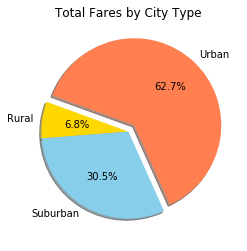

In [81]:
# Calculate Type Percents
fare_by_city = city_ride_df.groupby('type')['fare'].sum()
total_fares = city_ride_df['fare'].sum()
type_percent = fare_by_city/total_fares

#print(type_percent) - produced same results as homework instructions

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'SkyBlue', 'Coral']
explode = (0,0,0.1)
plt.pie(
    type_percent, 
    labels = labels, 
    colors = colors, 
    explode = explode, 
    autopct = "%1.1f%%", 
    startangle = 160, 
    shadow = True)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig('Total Fares by City Type - Pie')
plt.show()

#  Total Rides by City Type

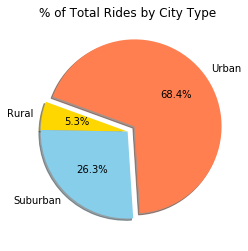

In [87]:
# Calculate Ride Percents
total_rides_by_city = city_ride_df['type'].value_counts()
total_rides = len(city_ride_df['type'])
percent_ride_city = total_rides_by_city / total_rides

#print(percent_ride_city) - produced same results as homework instructions

#build pie
percent_ride_city.sort_values(inplace= True)
plt.pie(
    percent_ride_city, 
    labels = labels, 
    colors = colors, 
    explode = explode, 
    autopct = "%1.1f%%", 
    startangle = 160, 
    shadow = True)
plt.title('% of Total Rides by City Type')
# Save Figure
plt.savefig('Total Rides by City Type - Pie')
plt.show()

# Total Drivers by City Type

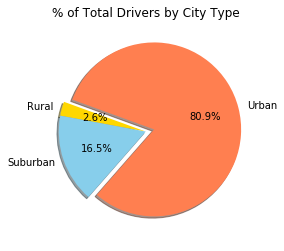

In [86]:
# Calculate Driver Percents
driver_city_type = city_df.groupby('type')['driver_count'].sum()
total_driver = city_df['driver_count'].sum()
percent_driver_city_type = driver_city_type / total_driver

#print(percent_driver_city_type) - produced same results as homework instructions

# Build Pie Charts
plt.pie(
    percent_driver_city_type, 
    labels = labels, 
    colors = colors, 
    explode = explode, 
    autopct = "%1.1f%%", 
    startangle = 160, 
    shadow = True)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('Total Driver by City Type - Pie')
plt.show()